# 画像処理

In [6]:
%matplotlib inline

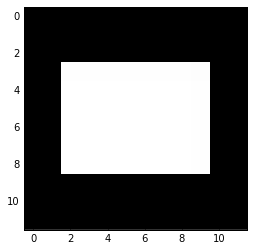

In [27]:
# 画像を読み込んで表示しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

plt.imshow( img, interpolation="None" )
plt.show()

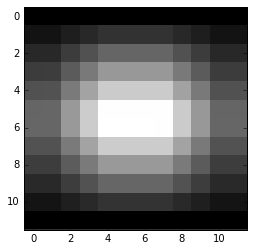

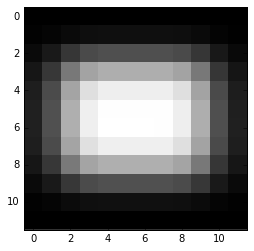

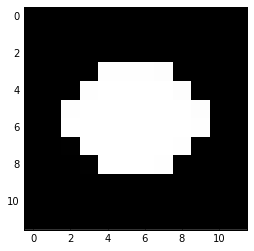

In [26]:
# 画像を平滑化しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.blur(img,(5,5))
plt.imshow( img2, interpolation="None" )

img2 = cv2.GaussianBlur(img,(5,5), 0)
plt.figure()
plt.imshow( img2, interpolation="None" )

img2 = cv2.medianBlur(img,5)
plt.figure()
plt.imshow( img2, interpolation="None" )

plt.show()

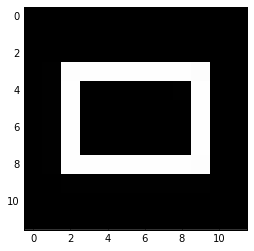

In [36]:
# エッジを抽出をしなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow( img2, interpolation="None" )

plt.show()